In [1]:
from helper_functions import load_just_hemingway_and_steinbeck
import pandas as pd
import spacy
nlp = spacy.load('en_core_web_lg')

c:\Users\KSpicer\Anaconda3\envs\python311\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os

def load_data(folder_path):
    root_folder = folder_path

    #filenames = []
    text_data = [] # Replace with the text data
    labels = [] # Replace with the corresponding labels (0 or 1)

    for subfolder in os.listdir(root_folder):
        subfolder_path = os.path.join(root_folder, subfolder)

        if subfolder == 'fitzgerald':
            label = 0
        else:
            label = 1

        for file in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, file)
            print("Processing file:", file)
            with open(file_path, 'r', encoding="utf-8") as f:
                text = f.read()
            #filenames.append(file_path)
            text_data.append(text)
            labels.append(label)
    return text_data, labels

In [3]:
text_data, labels = load_just_hemingway_and_steinbeck('data')

Processing file: hemingway_across_the_river.txt
Processing file: hemingway_bell_tolls.txt
Processing file: hemingway_collected_stories.txt
Processing file: hemingway_farewell.txt
Processing file: hemingway_green_hills_africa.txt
Processing file: hemingway_in_our_time.txt
Processing file: hemingway_men_without_women.txt
Processing file: hemingway_old_man.txt
Processing file: hemingway_sun_also.txt
Processing file: hemingway_ten_poems.txt
Processing file: hemingway_winner_take_nothing.txt
Processing file: steinbeck_cannery_row.txt
Processing file: steinbeck_east_of_eden.txt
Processing file: steinbeck_grapes.txt
Processing file: steinbeck_of_mice.txt
Processing file: steinbeck_the_pearl.txt
Processing file: steinbeck_the_red_pony.txt


In [4]:
df = pd.DataFrame(list(zip(text_data, labels)))
df= df.rename(columns={0: 'text_data', 1: 'labels'})
df.head()

,text_data,labels
0,Chapter I\n\nThey started two hours before day...,hemingway
1,"\nNo man is an Iland, intire of it selfe; ever...",hemingway
2,The Short Happy Life of\nFrancis Macomber\n\n...,hemingway
3,Book One\n1\nIn the late summer of that year w...,hemingway
4,PART I\n\nPURSUIT AND CONVERSATION\n\n\n\n\nCH...,hemingway


In [5]:
def count_sentences_and_words_per_sentence(text):
    doc = nlp(text)
    num_sentences = len(list(doc.sents))
    words_per_sentence = [len(list(sent)) for sent in doc.sents]
    return num_sentences, words_per_sentence

In [7]:
nlp.max_length = 1399867
df[['num_sentences', 'words_per_sentence']] = df['text_data'].apply(lambda x: pd.Series(count_sentences_and_words_per_sentence(x)))

In [8]:
df.head()

,text_data,labels,num_sentences,words_per_sentence
0,Chapter I\n\nThey started two hours before day...,hemingway,4313,"[3, 33, 33, 44, 58, 20, 13, 21, 20, 16, 22, 16..."
1,"\nNo man is an Iland, intire of it selfe; ever...",hemingway,13814,"[1, 95, 41, 28, 34, 11, 14, 9, 14, 17, 8, 28, ..."
2,The Short Happy Life of\nFrancis Macomber\n\n...,hemingway,22568,"[37, 11, 4, 14, 8, 11, 14, 45, 10, 4, 12, 67, ..."
3,Book One\n1\nIn the late summer of that year w...,hemingway,10263,"[33, 35, 21, 44, 12, 27, 19, 26, 24, 48, 37, 3..."
4,PART I\n\nPURSUIT AND CONVERSATION\n\n\n\n\nCH...,hemingway,4063,"[44, 17, 18, 37, 12, 10, 13, 15, 14, 7, 5, 32,..."


C:\Users\KSpicer\AppData\Local\Temp\ipykernel_2180\3312758715.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('labels').mean()


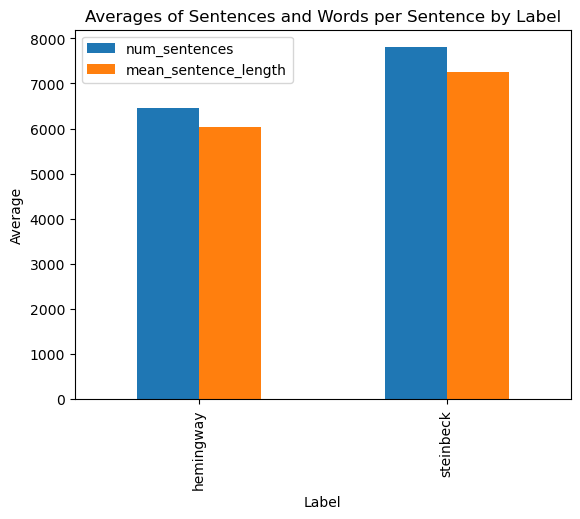

In [9]:
import matplotlib.pyplot as plt

# calculate the mean of the 'words_per_sentence' list
#df['mean_words_per_sentence'] = df['words_per_sentence'].apply(lambda x: sum(x)/len(x))

# calculate the mean sentence length
df['mean_sentence_length'] = df['words_per_sentence'].apply(lambda x: sum(x)/len(df))

# group by 'label' and calculate the means of 'num_sentences', 'mean_words_per_sentence', and 'mean_sentence_length'
grouped = df.groupby('labels').mean()

# create a bar plot of the means
grouped.plot(kind='bar')
plt.title('Averages of Sentences and Words per Sentence by Label')
plt.xlabel('Label')
plt.ylabel('Average')
plt.show()

C:\Users\KSpicer\AppData\Local\Temp\ipykernel_2180\2836893034.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped = df.groupby('labels').mean()


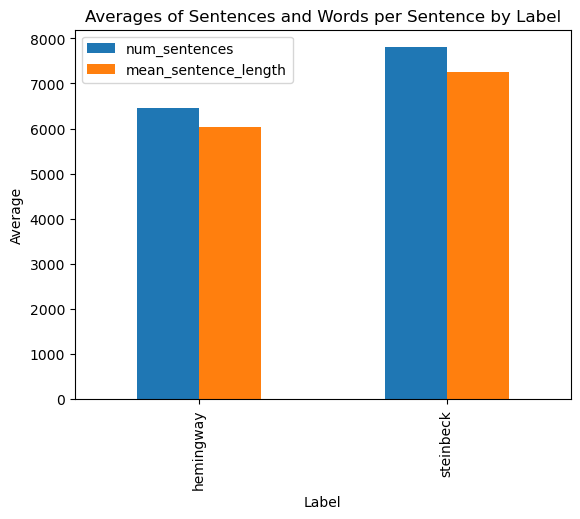

In [10]:
import matplotlib.pyplot as plt
grouped = df.groupby('labels').mean()

# create a bar plot of the means
grouped.plot(kind='bar')
plt.title('Averages of Sentences and Words per Sentence by Label')
plt.xlabel('Label')
plt.ylabel('Average')
plt.show()